# Simulation
Flip a coin 100 times and keep a record of the outcome as well as the evolution of the posterior distribution for the bias between heads and tails.



#### Prior
There are a few [common priors](https://en.wikipedia.org/wiki/Beta_distribution#Bayesian_inference) that could be applied here. 
As can see in the link, there are lengthy discussions to be had about which of these priors is recomended, and what they even imply about our initial assumptions about the situation. Here we use the Jefferies Prior, which offers a general purpose compromise. 
$$\mathrm{P}(\mathrm{heads}) \overset{\Delta}{=} \mathrm{Beta}\left(\alpha=\frac{1}{2},\beta=\frac{1}{2}\right)$$

#### Posterior
We will [update this distribution distribution](https://en.wikipedia.org/wiki/Beta_distribution#Effect_of_different_prior_probability_choices_on_the_posterior_beta_distribution) as we observe more and more coin tosses:

For $n$ samples, containing $h$ 'heads', the posterior distribution is:

$$\mathrm{P}(\mathrm{heads}) \overset{\Delta}{=} \mathrm{Beta}\left(\alpha=h+\alpha^{*},\beta=n-h+\beta^{*}\right)$$

where $\alpha^{*}$, $\beta^{*}$ are the previous estimates for $\alpha$ and $\beta$

In [1]:
# Libraries
# ---------
import pandas  as pd                # stats packages
import numpy   as np                # linear algebra packages

import matplotlib.pyplot as plt     # ploting packages
import seaborn as sns               # more plotting routines

from scipy.stats import beta        # funtion defining beta distribution
from scipy.stats import binom       # funtion defining binomial distribution

# Settings
# --------
plt.xkcd()                          # use 'cartoon-style'
sns.set_style('white')              # use white background 
c = sns.color_palette('deep')       # set color choices 

# Variables
# ---------
w = 0.75                            # set bias of weighted coin
n_trials = 100                      # set number of flips to perform
a = 0.5 ; b = 0.5                   # set initial parameter values
p = np.arange(0.01,1.0,0.01)        # possible 'probabilities of heads' to evaluate

In [2]:
# ... show plots in notebook ...
% matplotlib inline                 

In [3]:
# Run simulation
# --------------

# ... data object for storing results ...
clabs = ['h','a','b','q99','q01']
D = pd.DataFrame(
    columns=clabs,
    index=np.arange(-int(n_trials/4),n_trials))

for N in D.index :
    if N >= 1 : 
        # ... flip coin (coin is flipped once per sample) ...
        n = 1       
        h = binom.rvs(n,w,random_state=N)
        # ... update parameters ...
        a = h + a
        b = n - h + b
    else : 
        h = np.nan
    # ... store results ...
    D.loc[N,'h'] = h
    D.loc[N,'a'] = a
    D.loc[N,'b'] = b
        

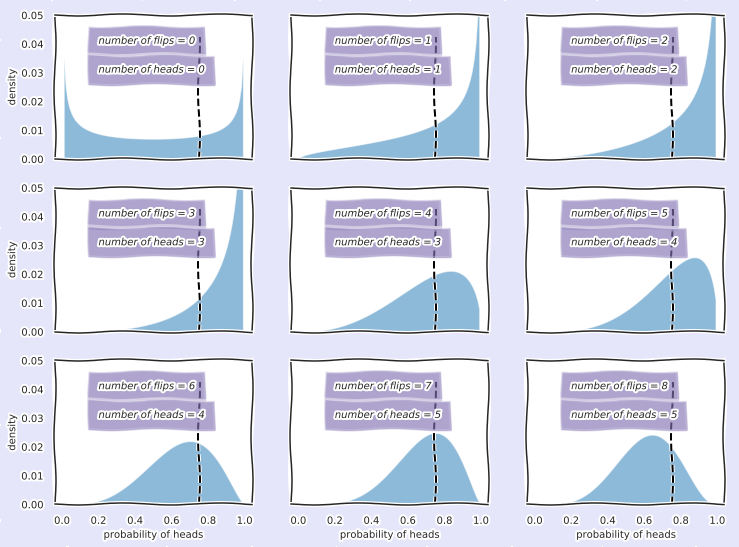

In [4]:
# Panel plot
# ----------

# ... create a figure ...
fig, chart = plt.subplots(             
    3,3,figsize=(12,9),
    sharex=True,sharey=True)
_ = fig.set_facecolor('lavender')

H = 0
for N in range(9) :
    if N != 0 : H += D.loc[N,'h']
    # ... calculate the prob. density for the test points ...
    dens = (beta.pdf(
        p,D.loc[N,'a'],D.loc[N,'b']) 
            / beta.pdf(p,D.loc[N,'a'],D.loc[N,'b']).sum())
    # ... show density ...
    chart[int(N/3),N%3].fill_between(p,dens,0,alpha=0.5)
    # ... write out how many times coin has been flipped ...
    chart[int(N/3),N%3].text(
        0.2,0.04,'number of flips = '+str(N), style='italic',
        bbox={'facecolor':c[4], 'alpha':0.4, 'pad':10})
    # write out how many times coin has come up heads
    chart[int(N/3),N%3].text(
        0.2,0.03,'number of heads = '+str(H), style='italic',
                             bbox={'facecolor':c[4], 'alpha':0.4, 'pad':10})
    # set y-axis limit
    chart[int(N/3),N%3].set_ylim(0,0.05)
    # draw line showing 'true' probability of heads
    chart[int(N/3),N%3].axvline(x=0.75,ymin=0,ymax=0.85,color='black',linestyle='--')
    # label axis
    if N>5 :
        chart[int(N/3),N%3].set_xlabel('probability of heads')
    if N%3 == 0 :
        chart[int(N/3),N%3].set_ylabel('density')

_ = plt.savefig('initialrun_coin_flips.png')

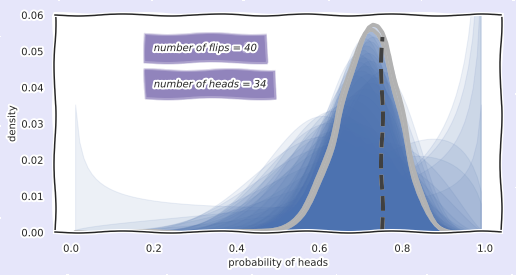

In [5]:
# Layered plot
# ------------

# ... create a figure ...
fig, chart = plt.subplots(1,figsize=(8,4))
_ = fig.set_facecolor('lavender')

n_draw = 40
for N in range(n_draw+1) : 
    if N != 0 : H += D.loc[N,'h']
    
    # ... calculate the prob. density for the test points ...
    dens = (beta.pdf(p,D.loc[N,'a'],D.loc[N,'b']) 
            / beta.pdf(p,D.loc[N,'a'],D.loc[N,'b'])
            .sum())
    # ... show evolving densities, with emphisis on final estimate ...
    if N < n_draw-1 :
        _ = chart.fill_between(p,dens,0,alpha=0.1,color=c[0])
    else :
        _ = chart.fill_between(p,dens,0,alpha=0.3,color=c[0])
        _ = chart.plot(p,dens,alpha=0.3,color='black',lw=4)
        _ = chart.axvline(x=0.75,ymin=0,ymax=0.9,color='black',
                          linestyle='--',alpha=0.75,lw=4)
        _ = chart.text(0.2,0.05,'number of flips = '+str(N), style='italic',
                       bbox={'facecolor':c[4], 'alpha':0.4, 'pad':10})
        _ = chart.text(0.2,0.04,'number of heads = '+str(H), style='italic',
                       bbox={'facecolor':c[4], 'alpha':0.4, 'pad':10})

# ... set y-axis limit ...
_ = chart.set_ylim(0,0.06)
# ... label axis ...
_ = chart.set_ylabel('density')
_ = chart.set_xlabel('probability of heads')
_ = plt.savefig('midrun_coin_flips.png')

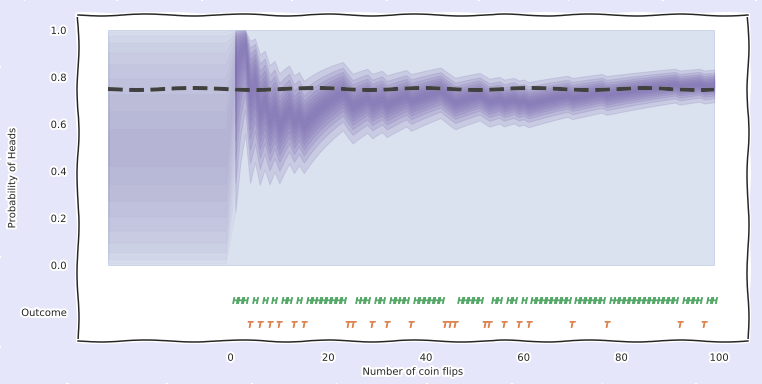

In [6]:
# Draw evolution
# --------------

# ... calculate the prob. density quantiles for the test points ...
tiles = ['q01'] + ['q'+str(x).zfill(2) for x in range(5,100,5)] + ['q99']
Q = pd.DataFrame(index=D.index,columns=tiles)
for N in D.index : 
    Q.loc[N,'q99'] = beta.ppf(0.99,D.loc[N,'a'],D.loc[N,'b'])
    Q.loc[N,'q01'] = beta.ppf(0.01,D.loc[N,'a'],D.loc[N,'b'])
    for x in range(5,100,5) :
        Q.loc[N,'q'+str(x).zfill(2)] = (
            beta.ppf(x/100,D.loc[N,'a'],D.loc[N,'b']))

Q = Q.astype(float)
        
# ... draw spread ---
fig, chart = plt.subplots(1,figsize=(12,6))
_ = fig.set_facecolor('lavender')
_ = chart.fill_between(D.index,0,1,alpha=0.2,color=c[0])

ix = list(range(1,n_trials))
for x in range(5,50,5) :
    _ = chart.fill_between(
        ix, Q.loc[ix,'q'+str(x).zfill(2)],
        Q.loc[ix,'q'+str(50+x).zfill(2)],
        alpha=0.2,color=c[4])

ix = range(D.index[0],2,2)
for x in range(5,50,5) :
    _ = chart.fill_between(
        ix, Q.loc[ix,'q'+str(x).zfill(2)],
        Q.loc[ix,'q'+str(50+x).zfill(2)],
        alpha=0.05,color=c[4])

ix_h = D.h == 1
ix_t = D.h == 0
_ = chart.scatter(D.index[ix_h],D.h[ix_h] - 1.15,marker='$H$',color=c[2])
_ = chart.scatter(D.index[ix_t],D.h[ix_t] - 0.25,marker='$T$',color=c[1])
_ = chart.plot(D.index,np.repeat(w,D.shape[0]),
               '--',color='black',alpha=0.75,lw=4)
_ = chart.set_xticks(range(0,101,20))
_ = chart.set_yticks(np.arange(-0.2,1.2,0.2))
_ = chart.set_yticklabels(['Outcome',0.0,0.2,0.4,0.6,0.8,1.0])
_ = chart.set_xlabel('Number of coin flips')
_ = chart.set_ylabel('Probability of Heads')
_ = plt.savefig('longrun_coin_flips.png')